     __  __ _     ____  
    |  \/  | |   |  _ \ 
    | |\/| | |   | |_) |
    | |  | | |___|  __/ 
    |_|  |_|_____|_|   
    Supervised Learning Project (MLP)

A multilayer perceptron (MLP) is a class of fully connected artificial neural network (ANN) with one or more hidden layers with an indeterminate number of neurons. To train the MLP network, the algorithm commonly used is the backpropagation algorithm. Example:

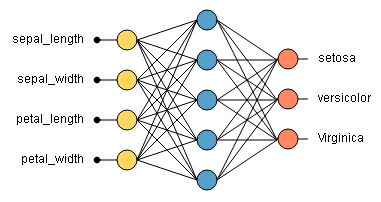

This project uses the handwritten digit database [MNIST](https://keras.io/api/datasets/mnist), for an image classification problem which is a multiclass classification problem. The Python library to use is [Keras](https://keras.io).

# Keras (TensorFlow)

The dataset used is the digit classification [MNIST](http://yann.lecun.com/exdb/mnist/), obtained from the `tf.keras.datasets` module, already vectorized in Numpy format, composed of a set dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images:

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
mnist = tf.keras.datasets.mnist

The Keras `load_data` function automatically downloads and stores it locally in the ~/.keras/datasets directory. The following command also stores the data in variables:

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


If the command is executed a second time, it loads the previously stored dataset from disk:

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Check the size of the dataset:

In [10]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

The variables are:

<dl>
<dt>x_train</dt><dd>uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data; pixel values range from 0 to 255</dd>
<dt>y_train</dt><dd>uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data</dd>
<dt>x_test</dt><dd>uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data; pixel values range from 0 to 255</dd>
<dt>y_test</dt><dd>uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data</dd>
</dl>

The `x_train` data is the "resources", which in this case are pixel values of the images (a feature), and the y_train is the label (0, 1, ..., 9). `x_train` and `y_train` are the "out-of-sample" examples used to test the model. 

The Neural Network can overfit the data, so we need to ensure that it is generalizing and learning the real problem and the patterns associated with it, rather than just memorizing it.

Shows the shape of the variable:

In [17]:
x_train.shape

(60000, 28, 28)

Shows what a digit looks like:

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Shows the digit:

In [3]:
import matplotlib.pyplot as plt

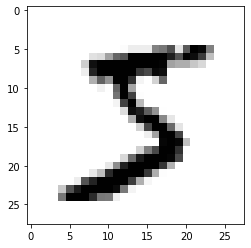

In [22]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

Shows the corresponding label:

In [23]:
y_train[0]

5

## Normalizing the data

One of the best practices for training a Neural Network is to normalize the data to obtain an average close to 0, and in this way accelerate learning as it leads to faster convergence.

The `tf.keras.utils.normalize` function returns the normalized copy of the Numpy array. The `axis` argument sets the axis along which to normalize.

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Showing what a normalized digit looks like:

In [29]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

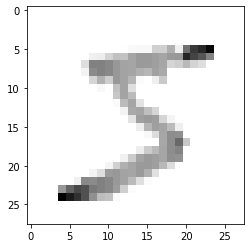

In [30]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

## Build a model

Let's choose the Keras sequential model (`keras.Sequential`), which is suitable for a simple layer stack where each layer has exactly one input tensor and one output tensor. It means it is a feed forward model without going backwards in the opposite direction. Example:

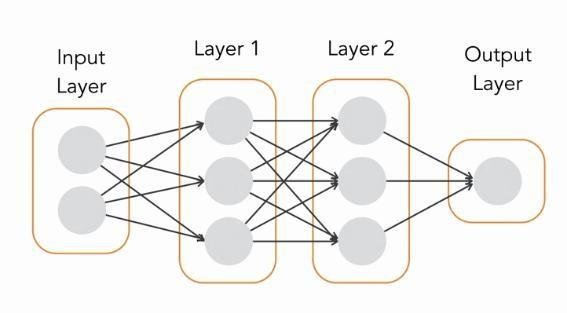

In [5]:
model = tf.keras.models.Sequential()

2022-06-19 12:35:08.586093: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-19 12:35:08.975104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1884 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


## Flattening

The next step is to transform the 2D array into a 1D array so that it can be used in the input layer. Examples of flattening:

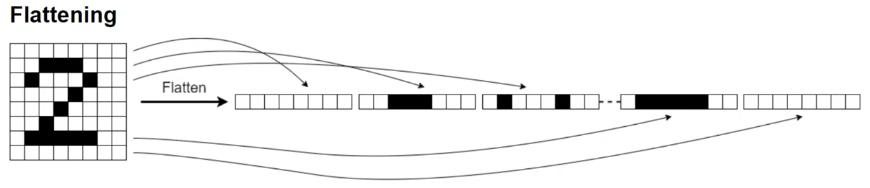

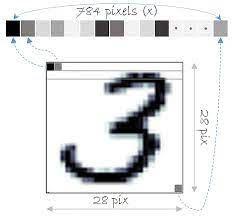

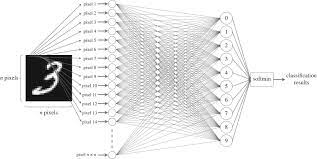

Keras has a function called `tf.keras.layers.Flatten` that flattens the multidimensional input tensors (arrays with data) to a single dimension, allowing the input layer to be modeled:

In [6]:
model.add(tf.keras.layers.Flatten())

The `model` object now contains a 1D array, which serves as the input layer.

In [7]:
model

## Hidden dense layers

*Dense* is one of Keras' built-in layers (linke Conv2D, MaxPooling2D, Flatten, etc.) for different use cases and applications. It is a regular layer of neural network that is deeply connected, which means that each neuron in the dense layer receives input from all neurons in its previous layer, and it is the most common and frequently used model.

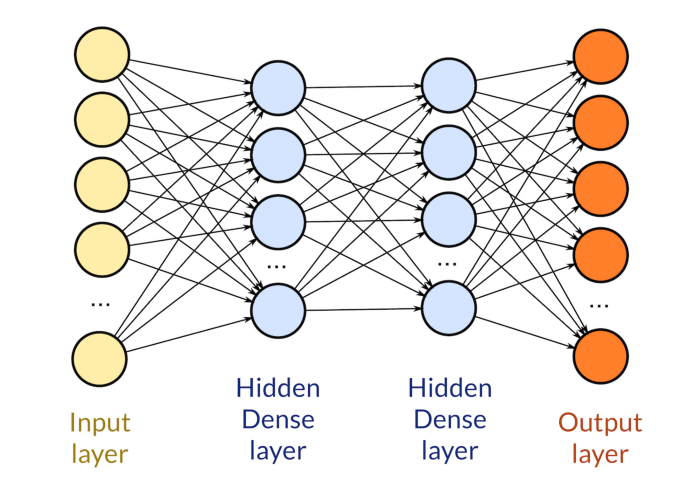

In the `keras.layers.Dense` function the most basic parameter of all is `Units`, which takes a positive integer as a value and represents the output size of the layer (number of neurons). It plays an important role in the size of the weight matrix, along with the bias vector.

In this project, to determine the number of units, we are going to use a commonly invoked empirically derived rule of thumb which says that the optimal hidden layer size is generally between the size of the input layers (784) and the size of the output layers (10). So let's initially choose 128.

The [tf.nn.relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) function applies an [ReLU activation function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) to an output:

In [8]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Let's create a second dense hidden layer, similar to the first:

In [9]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

## The output layer

As there are 10 digits, the output layer will be 10 nodes. In this layer, the activation function will be [softmax](https://en.wikipedia.org/wiki/Softmax_function) which is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes, based on [Luce's choice axiom](https://en.wikipedia.org/wiki/Luce%27s_choice_axiom) which states that the probability of selecting one item over another from a set of many items is not affected by the presence or absence of other items in the set (selection of this type has "independence from irrelevant alternatives"):

In [10]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

## Configures the model for training

The Keras `compile` method configures the model for training. In the `optmizer` parameter we can choose one of the [various types of optimizers available](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). For this project, we chose the [Adam](https://keras.io/api/optimizers/adam/) optimizer, which is an extension to stochastic gradient descent that has recently seen wider adoption for deep learning applications in computer vision and natural language processing. It is a computationally efficient algorithm that can be used in [non-convex optimization problems](https://www.quora.com/Are-the-optimization-problems-in-deep-learning-typically-convex-or-non-convex) (common in NN) instead of the classical stochastic gradient descent procedure to iteratively update the network weights based on the training data.

The loss parameter selects the loss function that has the purpose of calculating the amount that a model should seek to minimize during training. Keras has several [loss models](https://keras.io/api/losses/) available, and for this project we are going to select the [sparse_categorical_crossentropy function](sparse_categorical_crossentropy function) which calculates the cross entropy loss between true labels and predicted labels, and is used in case of cross entropy loss for binary classification (0 or 1) applications.

For multiclass classification problems, categorical cross entropy is generally used to calculate the neural network loss value, however it requires that the data be encoded and converted into a categorical format. The problem is that this is often not what the dataset looks like when we start building the models. Instead, we probably have feature vectors with integer targets as the numbers 0 through 9, and that means we'll have to convert those targets first. In Keras this can be done with to_categorical, which basically applies one-hot encoding (turns categories into columns) to training set targets. To try to avoid this type of data adjustment, there is a loss model called sparse categorical entropy, which we are using in our project.

And finally the last parameter that we are going to use is the metric [accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) which is a function used to evaluate the performance of the model, calculating the frequency with that the predictions are the same as the labels. This metric creates two local variables, `total` and `count` that are used to compute the frequency with which `y_pred` matches `y_true`. This frequency is ultimately returned as binary accuracy, an idempotent operation that simply divides total by count:

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Trains the model for a fixed number of epochs (iterations on a dataset)

After creating the model, we can configure the model with losses and metrics with model.compile(), train the model with model.fit(), or use the model to make predictions with model.predict(). The following command does the training (fit) using 3 epochs. Each epoch is an arbitrary cutoff, generally defined as "a pass through the entire dataset", used to separate training into distinct phases, which is useful for periodic recording and evaluation. In other words, an epoch number means how many times we go through the training set. As we train, for each epoch we can see the loss decrease and the accuracy improve.

In [12]:
model.fit(x_train, y_train, epochs=3)

2022-06-18 13:42:58.171305: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-18 13:42:58.261121: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/3
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4630 - accuracy: 0.8671
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1122 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0719 - accuracy: 0.9773


When we get a high precision and a low loss it can mean two things: i) that the model has learned to classify digits in general (generalized); or ii) simply memorized all the examples we showed him (overfitted). That's why we need to test on out-of-sample data that was not used to train the model.

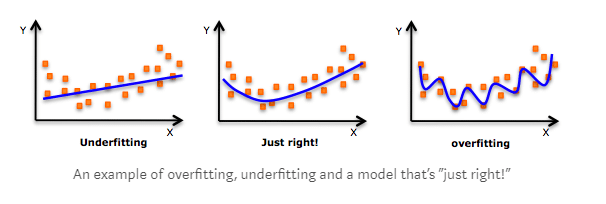

The Keras `evaluate` function returns the scalar loss value (if the model has a single output and no metric) or the list of scalars (if the model has multiple outputs and/or metrics), and the metric values for the model in test mode:

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0926 - accuracy: 0.9716


[0.09264422208070755, 0.9715999960899353]

As the out-of-sample accuracy and loss is a little worse, this usually means it's ok. If it was identical or better, it could indicate a problem.

Let's save the model for later use:

In [14]:
model.save('epic_num_reader.model')

2022-06-18 16:00:12.433735: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


Load it back:

In [15]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

# Make predictions

In [16]:
predictions = new_model.predict(x_test)

The result is in the form of a probability distribution:

In [17]:
predictions

array([[9.7344797e-12, 5.9873040e-09, 2.5342342e-05, ..., 9.9986422e-01,
        7.5057422e-08, 1.2540883e-07],
       [6.9643256e-11, 5.6408844e-05, 9.9993801e-01, ..., 1.2002526e-08,
        8.5264524e-09, 8.0997309e-14],
       [3.2733315e-08, 9.9835193e-01, 4.4970328e-04, ..., 9.3695114e-04,
        6.9428570e-05, 3.4473535e-07],
       ...,
       [5.3142175e-09, 2.0881798e-06, 5.1642150e-08, ..., 2.6638911e-04,
        5.4391699e-06, 1.2433293e-03],
       [1.0207207e-06, 7.6184540e-07, 9.5382745e-07, ..., 3.0352394e-05,
        9.8360190e-04, 2.0475674e-07],
       [2.6767142e-07, 7.9472571e-09, 5.8542568e-08, ..., 7.6342870e-11,
        6.5589447e-08, 2.6209270e-09]], dtype=float32)

In [18]:
predictions.shape

(10000, 10)

To see what the number is:

In [19]:
import numpy as np
np.argmax(predictions[0])

7

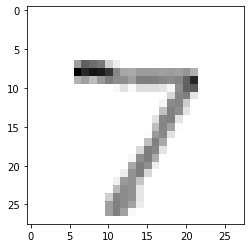

In [21]:
plt.imshow(x_test[0], cmap=plt.cm.binary)

## Profiling

For profiling, let's follow the previous steps up to before training (model.fit) and create a TensorBoard callback to capture performance profiles, call it during model training, and enable visualizations. The `log_dir` parameter sets the directory path where to save the log files to be analyzed by TensorBoard. `histogram_freq` is the frequency (in epochs) at which to compute weight histograms for the layers of the model. `profile_batch` is the profile of the batch(s) to sample the compute characteristics:

In [13]:
# Create a TensorBoard callback
from datetime import datetime
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tboard_callback = keras.callbacks.TensorBoard(log_dir=logs,
                                              histogram_freq=1,
                                              profile_batch='500,520')

2022-06-19 12:42:24.480752: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-06-19 12:42:24.480821: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-06-19 12:42:24.690037: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1630] Profiler found 1 GPUs
2022-06-19 12:42:25.074897: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-06-19 12:42:25.075054: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1764] CUPTI activity buffer flushed


Let's train the model as before, but this time adding `validation_data` to evaluate the loss and any model metrics at the end of each epoch, and `callbacks` with the list of callbacks to be applied during training:

In [14]:
model.fit(x_train, y_train,
          epochs=3,
          validation_data=(x_test, y_test),
          callbacks=[tboard_callback])

2022-06-19 12:51:02.041391: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-06-19 12:51:02.802155: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
 500/1875 [=======>......................] - ETA: 1s - loss: 0.4692 - accuracy: 0.8669

2022-06-19 12:51:07.233646: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-06-19 12:51:07.233690: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-06-19 12:51:07.294858: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-06-19 12:51:07.295731: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1764] CUPTI activity buffer flushed
2022-06-19 12:51:07.379014: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:521]  GpuTracer has collected 1404 callback api events and 1343 activity events. 
2022-06-19 12:51:07.474129: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-06-19 12:51:07.619512: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20220619-124224/plugins/profile/2022_06_19_12_51_07

2022-06-19 12:51:07.653659: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumpe

 643/1875 [=========>....................] - ETA: 2s - loss: 0.4198 - accuracy: 0.8797

2022-06-19 12:51:07.751805: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20220619-124224/plugins/profile/2022_06_19_12_51_07

2022-06-19 12:51:07.758333: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/20220619-124224/plugins/profile/2022_06_19_12_51_07/L340.memory_profile.json.gz
2022-06-19 12:51:07.758917: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/20220619-124224/plugins/profile/2022_06_19_12_51_07
Dumped tool data for xplane.pb to logs/20220619-124224/plugins/profile/2022_06_19_12_51_07/L340.xplane.pb
Dumped tool data for overview_page.pb to logs/20220619-124224/plugins/profile/2022_06_19_12_51_07/L340.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/20220619-124224/plugins/profile/2022_06_19_12_51_07/L340.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to logs/20220619-124224/plugins/profile/2022_06_19_1

1875/1875 [==============================] - 6s 2ms/step - loss: 0.2569 - accuracy: 0.9241 - val_loss: 0.1347 - val_accuracy: 0.9596
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1048 - accuracy: 0.9678 - val_loss: 0.1092 - val_accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0717 - accuracy: 0.9771 - val_loss: 0.1151 - val_accuracy: 0.9668


# TensorBoard

TensorBoard provides the visualization and tooling needed for machine learning experimentation, including: i) tracking and visualizing metrics such as loss and accuracy; ii) visualizing the model graph (ops and layers), viewing histograms of weights, biases, or other tensors as they change over time; iii) projecting embeddings to a lower dimensional space; iv) displaying images, text, and audio data; v) profiling TensorFlow programs; and other resources.

Load the TensorBoard notebook extension:

In [15]:
%load_ext tensorboard

Launch TensorBoard and navigate to the Profile tab to view performance profile:

In [16]:
%tensorboard --logdir=logs

# References

- TensorFlow library for machine learning and artificial intelligence https://www.tensorflow.org
- Keras library that provides a interface for artificial neural networks https://keras.io
- PyTorch Lightning library that provides a high-level interface for PyTorch https://pytorch-lightning.readthedocs.io
- Rede Neural Perceptron Multicamadas https://medium.com/ensina-ai/rede-neural-perceptron-multicamadas-f9de8471f1a9
- Introduction to Deep Learning - Deep Learning basics with Python, TensorFlow and Keras https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras
- Deep Learning Book https://www.deeplearningbook.com.br
- Why Data should be Normalized before Training a Neural Network https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d
- CNTK 103: Part A - MNIST Data Loader https://cntk.azurewebsites.net/pythondocs/CNTK_103A_MNIST_DataLoader.html
- Keras Dense Layer Explained for Beginners https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/
- How to choose the number of hidden layers and nodes in a feedforward neural network? https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
- Rectifier (neural networks) https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
- Softmax function https://en.wikipedia.org/wiki/Softmax_function
- Gentle Introduction to the Adam Optimization Algorithm for Deep Learning https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
- Are the optimization problems in deep learning typically convex or non-convex? https://www.quora.com/Are-the-optimization-problems-in-deep-learning-typically-convex-or-non-convex
- TensorFlow Profiler: Profile model performance https://www.tensorflow.org/tensorboard/tensorboard_profiling_keras

# Versions

In [1]:
import tensorflow as tf
tf.__version__

'2.8.1'

In [2]:
tf.test.gpu_device_name()

2022-06-19 11:20:04.746983: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-19 11:20:12.152406: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 1911 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


'/device:GPU:0'

In [16]:
import tensorflow.keras as keras
print(keras.__version__)

2.8.0


In [17]:
import torch
print(torch.__version__)

/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.11.0


In [18]:
import pytorch_lightning as pl
print(pl.__version__)

1.6.4


# Requirements

```bash
$ conda install -c pytorch pytorch torchvision torchaudio cudatoolkit=10.2 torchmetrics pytorch-lightning
$ conda install -c conda-forge tensorflow tensorflow-gpu tensorflow-estimator tensorboard matplotlib
$ pip install -U tensorboard_plugin_profile
```